## <center>INTRACRANIAL HEMORRHAGES DATABASE - EXPLORING DATA ANALYSIS (EDA) & DESCRIPTIVE STATISTICS 2 (PREDICTORS)</center>

In this Notebook an Eploratory Data Analysis (EDA) and a Descriptive Statistic Analysis is performed after the following steps:

1. Load data and metadata.
2. Check the pandas datatype and the *a priori* variable type of the dataset variables.
3. Exploring and making a statistical description of the *a priori* predictor variables.

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from additional_functions_module.add_functs_lib import useful_functions

### 1. Load data and metadata

In [2]:
df= pd.read_hdf('Databases/ICH_database.hdf5')
df_metadata= pd.read_csv('Databases/ICH_database_metadata.csv')
df.head(4)

,patient,sex,hospital,follow_up,final_outcome,nfamily_medhist,tobacco,n_tobacco,drugs,alcohol,...,rdw,mchc,mpv,mch,inr,fibrinogen,maxfibrinogen,time_between_CT_bloodanalysis,age,survival_days
0,1,1,1.0,2.0,2.0,17,2.0,NaN,0,0,...,17.0,33.0,9.0,28.1,4.21,344.0,618.0,0,74,4
1,2,2,2.0,0.0,1.0,4,0.0,0.0,0,0,...,14.7,32.5,10.7,29.8,NaN,NaN,1081.0,0,81,2128
2,3,2,1.0,0.0,0.0,8,0.0,0.0,0,0,...,14.0,33.1,8.7,30.1,3.16,298.0,470.0,0,78,2388
3,4,2,1.0,2.0,2.0,8,0.0,0.0,0,0,...,15.8,34.1,7.6,19.3,1.09,344.0,344.0,0,79,7


In [3]:
df_metadata.head(2)

,Variable_Name,Variable_Label,Variable_Definition,R_Datatype,Python_Datatype,Pandas_Datatype,Values,Maximum_Number_of_Different_Values_in_the_Dataset,Comment,Type_of_Variable
0,Patient Number,patient,Patient index,numeric,int,int64,From 1 to 300,300,NaN,Auxiliary
1,SEXO (1-Hombre; 2-Mujer),sex,Patient sex,factor,int,category,1 (Men) or 2 (Women),2,NaN,Predictor


### 2. Check the pandas datatype and the *a priori* variable type of the dataset variables

In [4]:
for column in df.columns:
    print(column, '-'*(30-len(column)) + '>', df[column].dtypes, '-'*(12-len(str(df[column].dtypes))) + '>', df_metadata[df_metadata['Variable_Label'] == column]['Type_of_Variable'].values[0])

patient -----------------------> int64 -------> Auxiliary
sex ---------------------------> category ----> Predictor
hospital ----------------------> category ----> Auxiliary
follow_up ---------------------> category ----> Outcome
final_outcome -----------------> category ----> Outcome
nfamily_medhist ---------------> int64 -------> Predictor
tobacco -----------------------> category ----> Predictor
n_tobacco ---------------------> float64 -----> Predictor
drugs -------------------------> category ----> Predictor
alcohol -----------------------> category ----> Predictor
g_alcohol ---------------------> float64 -----> Predictor
ht ----------------------------> category ----> Predictor
dmellitus ---------------------> category ----> Predictor
dyslipidemia ------------------> category ----> Predictor
previous_ich ------------------> category ----> Predictor
cv_diseases -------------------> category ----> Predictor
carrhythmias ------------------> category ----> Predictor
structural_heart_d

### 3. EDA & Statistical description of the *a priori* outcomes

### 3.1 Quantitative predictors
- **Descriptive statistics** (count, mean, standard deviation, minimum, 25%, 50%, 75%, maximum, skewness, kurtosis)
- **Visualization** (discrete - barplots and continuous - histograms)

*Note: kurtosis follows Person's definition (normal ==> 3.0)*

In [5]:
quantitatives= df_metadata[(df_metadata['Type_of_Variable'].str.contains('Predictor')) &
                           ((df_metadata['Pandas_Datatype'] == 'int64')
                           |(df_metadata['Pandas_Datatype'] == 'float64'))]['Variable_Label'].tolist()

print(quantitatives, end='')

['nfamily_medhist', 'n_tobacco', 'g_alcohol', 'antihypertensives', 'antidiabetics', 'hypolipidemics', 'anticoagulants', 'antiplatelets', 'chemotherapeutics', 'n_other_medications', 'sbp', 'dbp', 'spo2', 'temperature', 'bpm', 'rr', 'onset_h', 'hospitalizations_1y', 'hospitalizations_3y', 'hospitalizations_5y', 'hospitalization_days', 'hospitalization_icu_days', 'glucose', 'urea', 'creatinine', 'sodium', 'potasium', 'egfr', 'prothrombin_activity', 'leukocytes', 'erythrocytes', 'hemoglobin', 'hematocrit', 'platelets', 'mcv', 'rdw', 'mchc', 'mpv', 'mch', 'inr', 'fibrinogen', 'maxfibrinogen', 'age']

#### 3.1.1 Quantitative predictors - descriptive statistics

In [6]:
pd.concat([useful_functions.sdescribe(df=df, column=quantitative, decimals=2) for quantitative in quantitatives])

,count,mean,std,min,25%,50%,75%,max,skew,kurt
nfamily_medhist,300.0,5.03,3.30,0.00,3.00,4.50,7.00,19.00,1.01,4.58
n_tobacco,228.0,8.92,21.86,0.00,0.00,0.00,0.00,150.00,3.25,15.99
g_alcohol,252.0,8.33,26.64,0.00,0.00,0.00,0.00,200.00,3.79,19.15
antihypertensives,297.0,0.94,1.12,0.00,0.00,1.00,2.00,4.00,0.93,2.80
antidiabetics,300.0,0.21,0.53,0.00,0.00,0.00,0.00,3.00,2.74,10.61
hypolipidemics,300.0,0.26,0.46,0.00,0.00,0.00,1.00,2.00,1.37,3.63
anticoagulants,300.0,0.21,0.41,0.00,0.00,0.00,0.00,1.00,1.45,3.10
antiplatelets,300.0,0.29,0.52,0.00,0.00,0.00,1.00,2.00,1.59,4.61
chemotherapeutics,300.0,0.01,0.08,0.00,0.00,0.00,0.00,1.00,12.12,148.01
n_other_medications,300.0,1.58,1.95,0.00,0.00,1.00,3.00,11.00,1.62,6.02


#### 3.1.2 Quantitative predictors - visualization
- Quantitative discrete variables: barplots
- Quantitative continuos variables: histograms

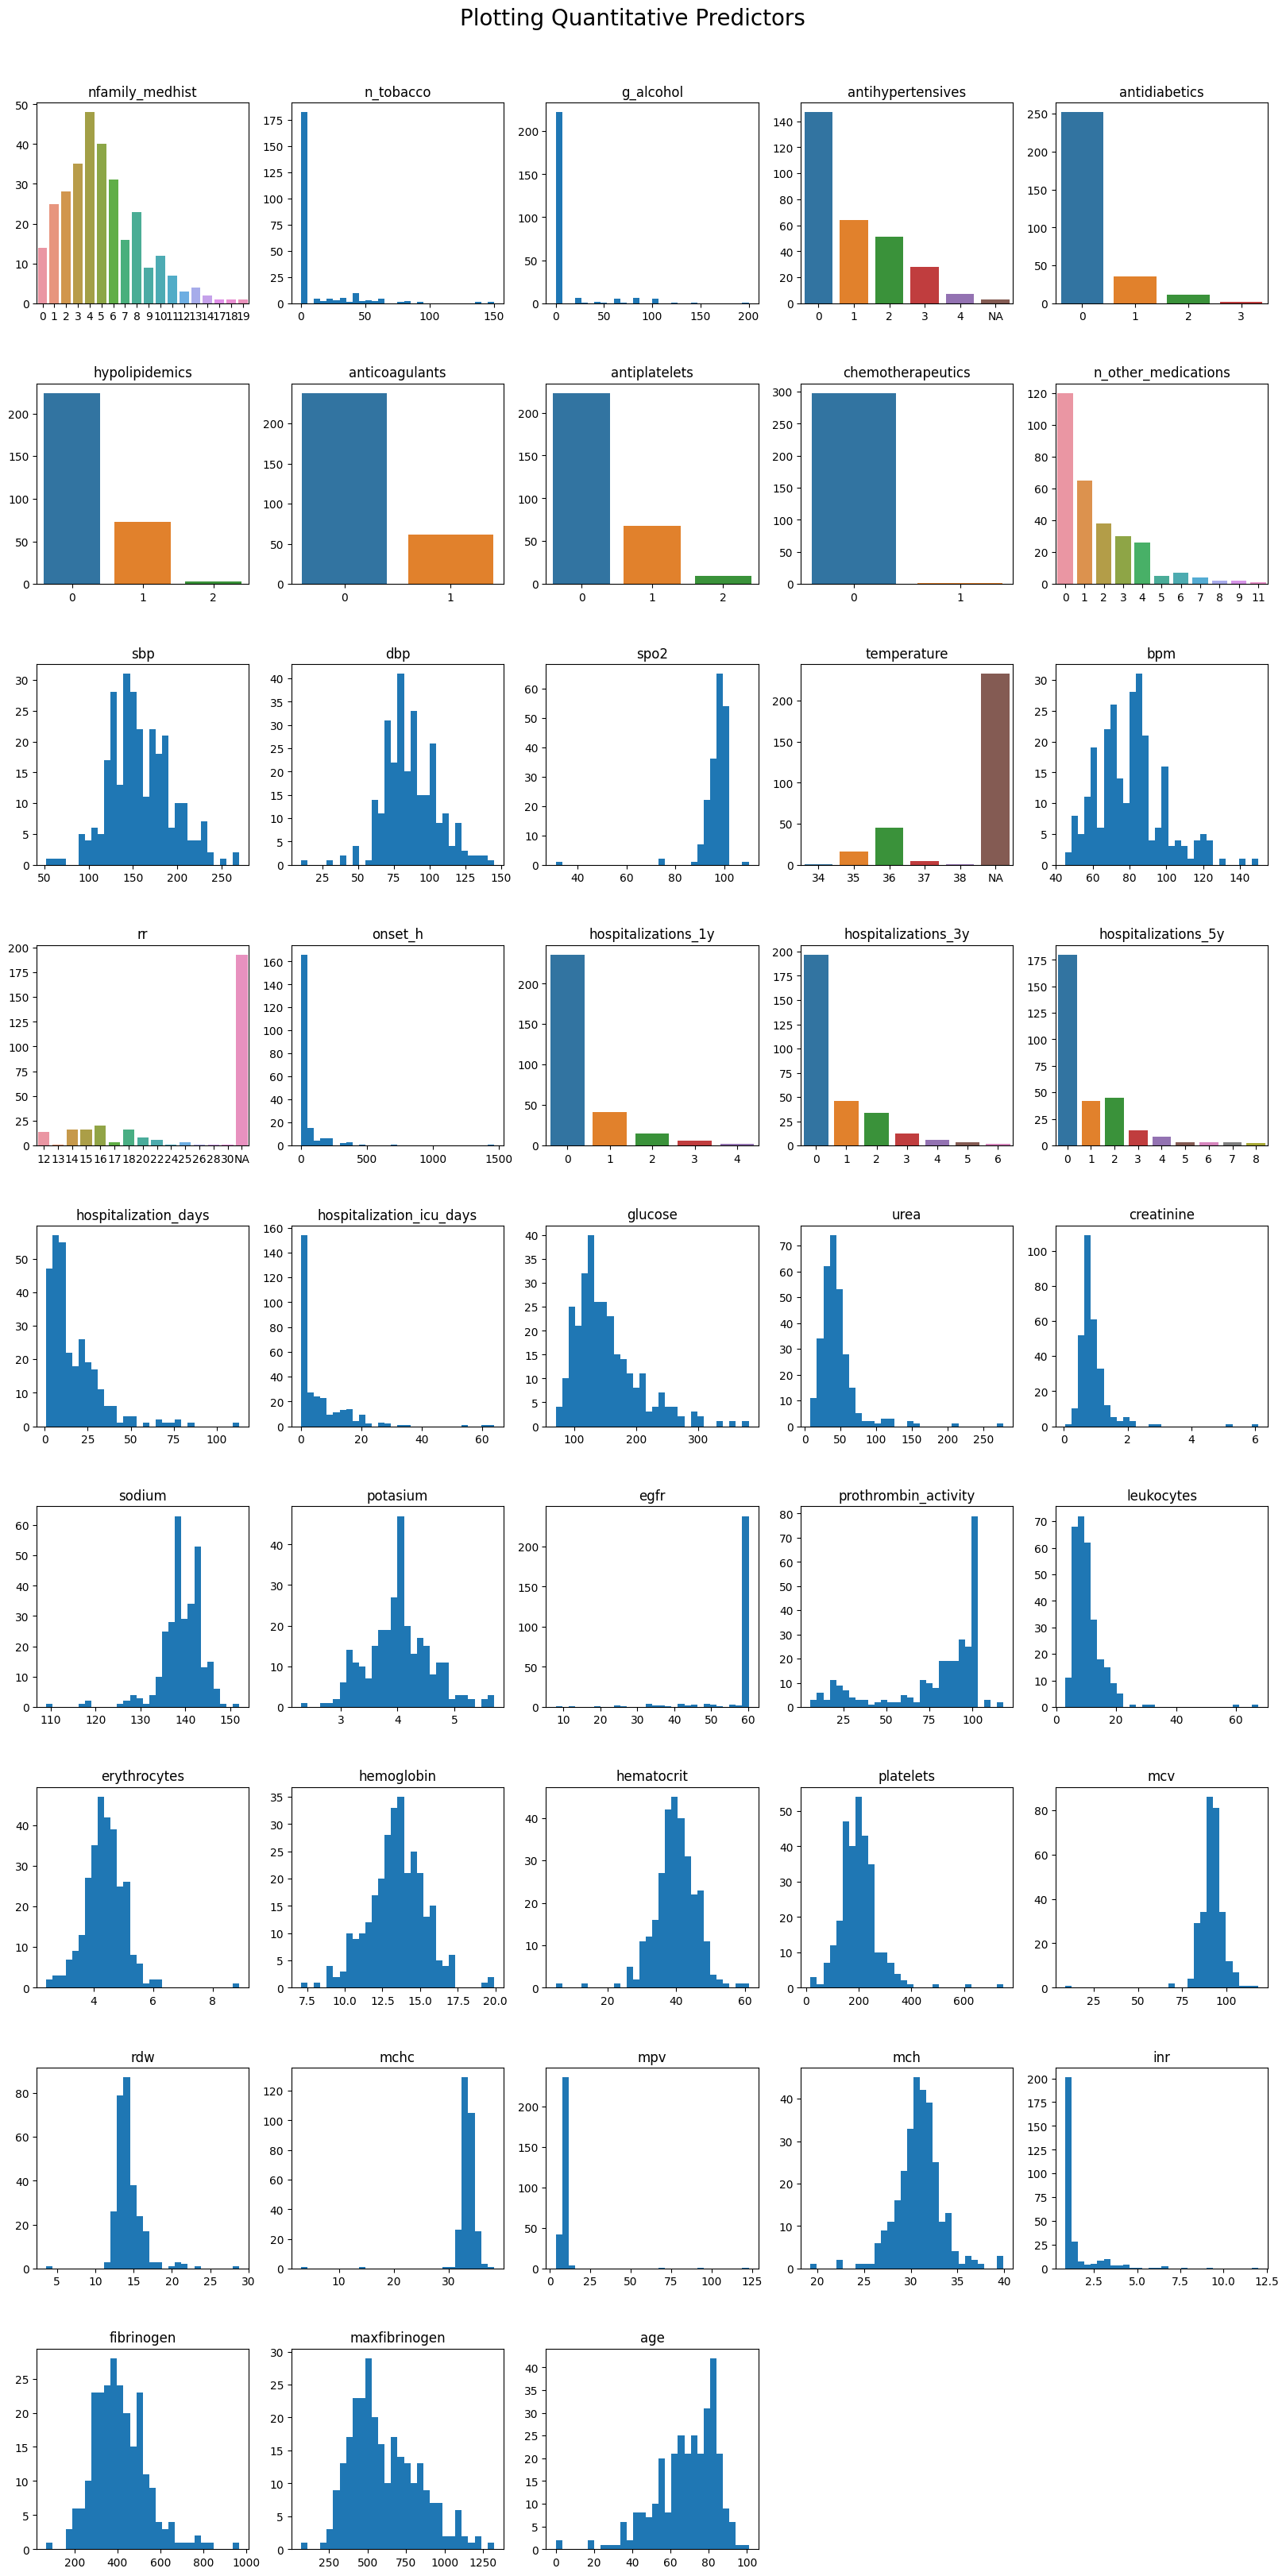

In [7]:
fig1, axs= plt.subplots(9,5, figsize=(20,40))
fig1.suptitle('Plotting Quantitative Predictors', fontsize=20, y=0.91)
idx= 0

bars= [0,3,4,5,6,7,8,9,13,15,17,18,19]

for i in range (9):
    for j in range (5):
        if idx in bars:
            useful_functions.plot(df, quantitatives[idx], axs[i,j], 'bars')
            axs[i,j].set_title(quantitatives[idx])
        elif idx < 43 and idx not in bars:
            axs[i,j].hist(df[quantitatives[idx]], bins=30)
            axs[i,j].set_title(quantitatives[idx])
        elif idx >= 43:
            axs[i,j].axis('off')
        
        axs[i,j].set_xlabel('')
        axs[i,j].set_ylabel('')
        
        idx= idx + 1

plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()

### 3.2 Qualitative predictors
- **Descriptive statistics** (frequency tables)
- **Visualization** (barplots)

In [8]:
all_qualitatives= df_metadata[(df_metadata['Type_of_Variable'].str.contains('Predictor')) &
                              (df_metadata['Pandas_Datatype'] == 'category')]['Variable_Label'].tolist()

all_qualitatives.insert(1,'hospital') # Add hospital whose type is labeled as 'Auxiliary' variable

In [9]:
# Election of most relevant qualitatives
qualitatives= ['sex', 'hospital', 'ht', 'previous_ich', 'depression', 'dementia', 'digoxin', 'aspirin', 'cumarinics',
               'headache', 'emesis', 'visual_disturbances', 'seizures', 'other_symptoms',
               'neurol_signs', 'diplopia', 'anisocoria', 'aphasia', 'dysarthria', 'altered_consciousness',
               'nuchal_rigidity', 'rfacial_palsy', 'lfacial_palsy', 'ruplimb_mimpairment', 'luplimb_mimpairment',
               'rlwlimb_mimpairment', 'llwlimb_mimpairment', 'balance_impairment', 'tgcs',
               'primary_ich', 'vascular_ich', 'traumatic_ich', 'ht_ich', 'amyloidangiopathy_ich',
               'aneurysmal_ich', 'avm_ich','hti_ich','other_ich',
               'neurosurg', 'interprocedures']

#### 3.2.1 Qualitative predictors - descriptive statistics

In [10]:
idx=0
for i in range(10):
    useful_functions.display_side_by_side(
        useful_functions.freqtab(df=df, column=qualitatives[idx],   decimals=2),
        useful_functions.freqtab(df=df, column=qualitatives[idx+1], decimals=2),
        useful_functions.freqtab(df=df, column=qualitatives[idx+2], decimals=2),
        useful_functions.freqtab(df=df, column=qualitatives[idx+3], decimals=2))
    idx+=4

sex,count (n),percentage (%)
1,182,60.67
2,118,39.33
NA,0,0.00
TOTAL,300,100.00
hospital,count (n),percentage (%)
1.0,257,85.67
2.0,17,5.67
3.0,11,3.67
NA,15,5.00
TOTAL,300,100.01


depression,count (n),percentage (%)
0,274,91.33
1,26,8.67
NA,0,0.00
TOTAL,300,100.00
dementia,count (n),percentage (%)
0,266,88.67
1,34,11.33
NA,0,0.00
TOTAL,300,100.00
digoxin,count (n),percentage (%)


cumarinics,count (n),percentage (%)
0,242,80.67
1,58,19.33
NA,0,0.00
TOTAL,300,100.00
headache,count (n),percentage (%)
0.0,224,74.67
1.0,74,24.67
NA,2,0.67
TOTAL,300,100.01
emesis,count (n),percentage (%)


seizures,count (n),percentage (%)
0.0,282,94.0
1.0,15,5.0
NA,3,1.0
TOTAL,300,100.0
other_symptoms,count (n),percentage (%)
0.0,137,45.67
1.0,161,53.67
NA,2,0.67
TOTAL,300,100.01
neurol_signs,count (n),percentage (%)


anisocoria,count (n),percentage (%)
0.0,261,87.00
1.0,37,12.33
NA,2,0.67
TOTAL,300,100.00
aphasia,count (n),percentage (%)
0.0,212,70.67
1.0,70,23.33
NA,18,6.00
TOTAL,300,100.00
dysarthria,count (n),percentage (%)


nuchal_rigidity,count (n),percentage (%)
0.0,293,97.67
1.0,4,1.33
NA,3,1.00
TOTAL,300,100.00
rfacial_palsy,count (n),percentage (%)
0.0,265,88.33
1.0,25,8.33
NA,10,3.33
TOTAL,300,99.99
lfacial_palsy,count (n),percentage (%)


luplimb_mimpairment,count (n),percentage (%)
0.0,222,74.00
1.0,56,18.67
NA,22,7.33
TOTAL,300,100.00
rlwlimb_mimpairment,count (n),percentage (%)
0.0,218,72.67
1.0,60,20.00
NA,22,7.33
TOTAL,300,100.00
llwlimb_mimpairment,count (n),percentage (%)


tgcs,count (n),percentage (%)
3.0,24,8.00
4.0,8,2.67
5.0,10,3.33
6.0,7,2.33
7.0,10,3.33
8.0,9,3.00
9.0,8,2.67
10.0,14,4.67
11.0,11,3.67
12.0,13,4.33


ht_ich,count (n),percentage (%)
0,216,72.0
1,84,28.0
NA,0,0.0
TOTAL,300,100.0
amyloidangiopathy_ich,count (n),percentage (%)
0,295,98.33
1,5,1.67
NA,0,0.00
TOTAL,300,100.00
aneurysmal_ich,count (n),percentage (%)


hti_ich,count (n),percentage (%)
0,287,95.67
1,1,0.33
2,4,1.33
3,5,1.67
5,2,0.67
6,1,0.33
NA,0,0.00
TOTAL,300,100.00
other_ich,count (n),percentage (%)
0.0,296,98.67


#### 3.2.2 Qualitative predictors - visualization
- Qualitative categorical variables: barplots

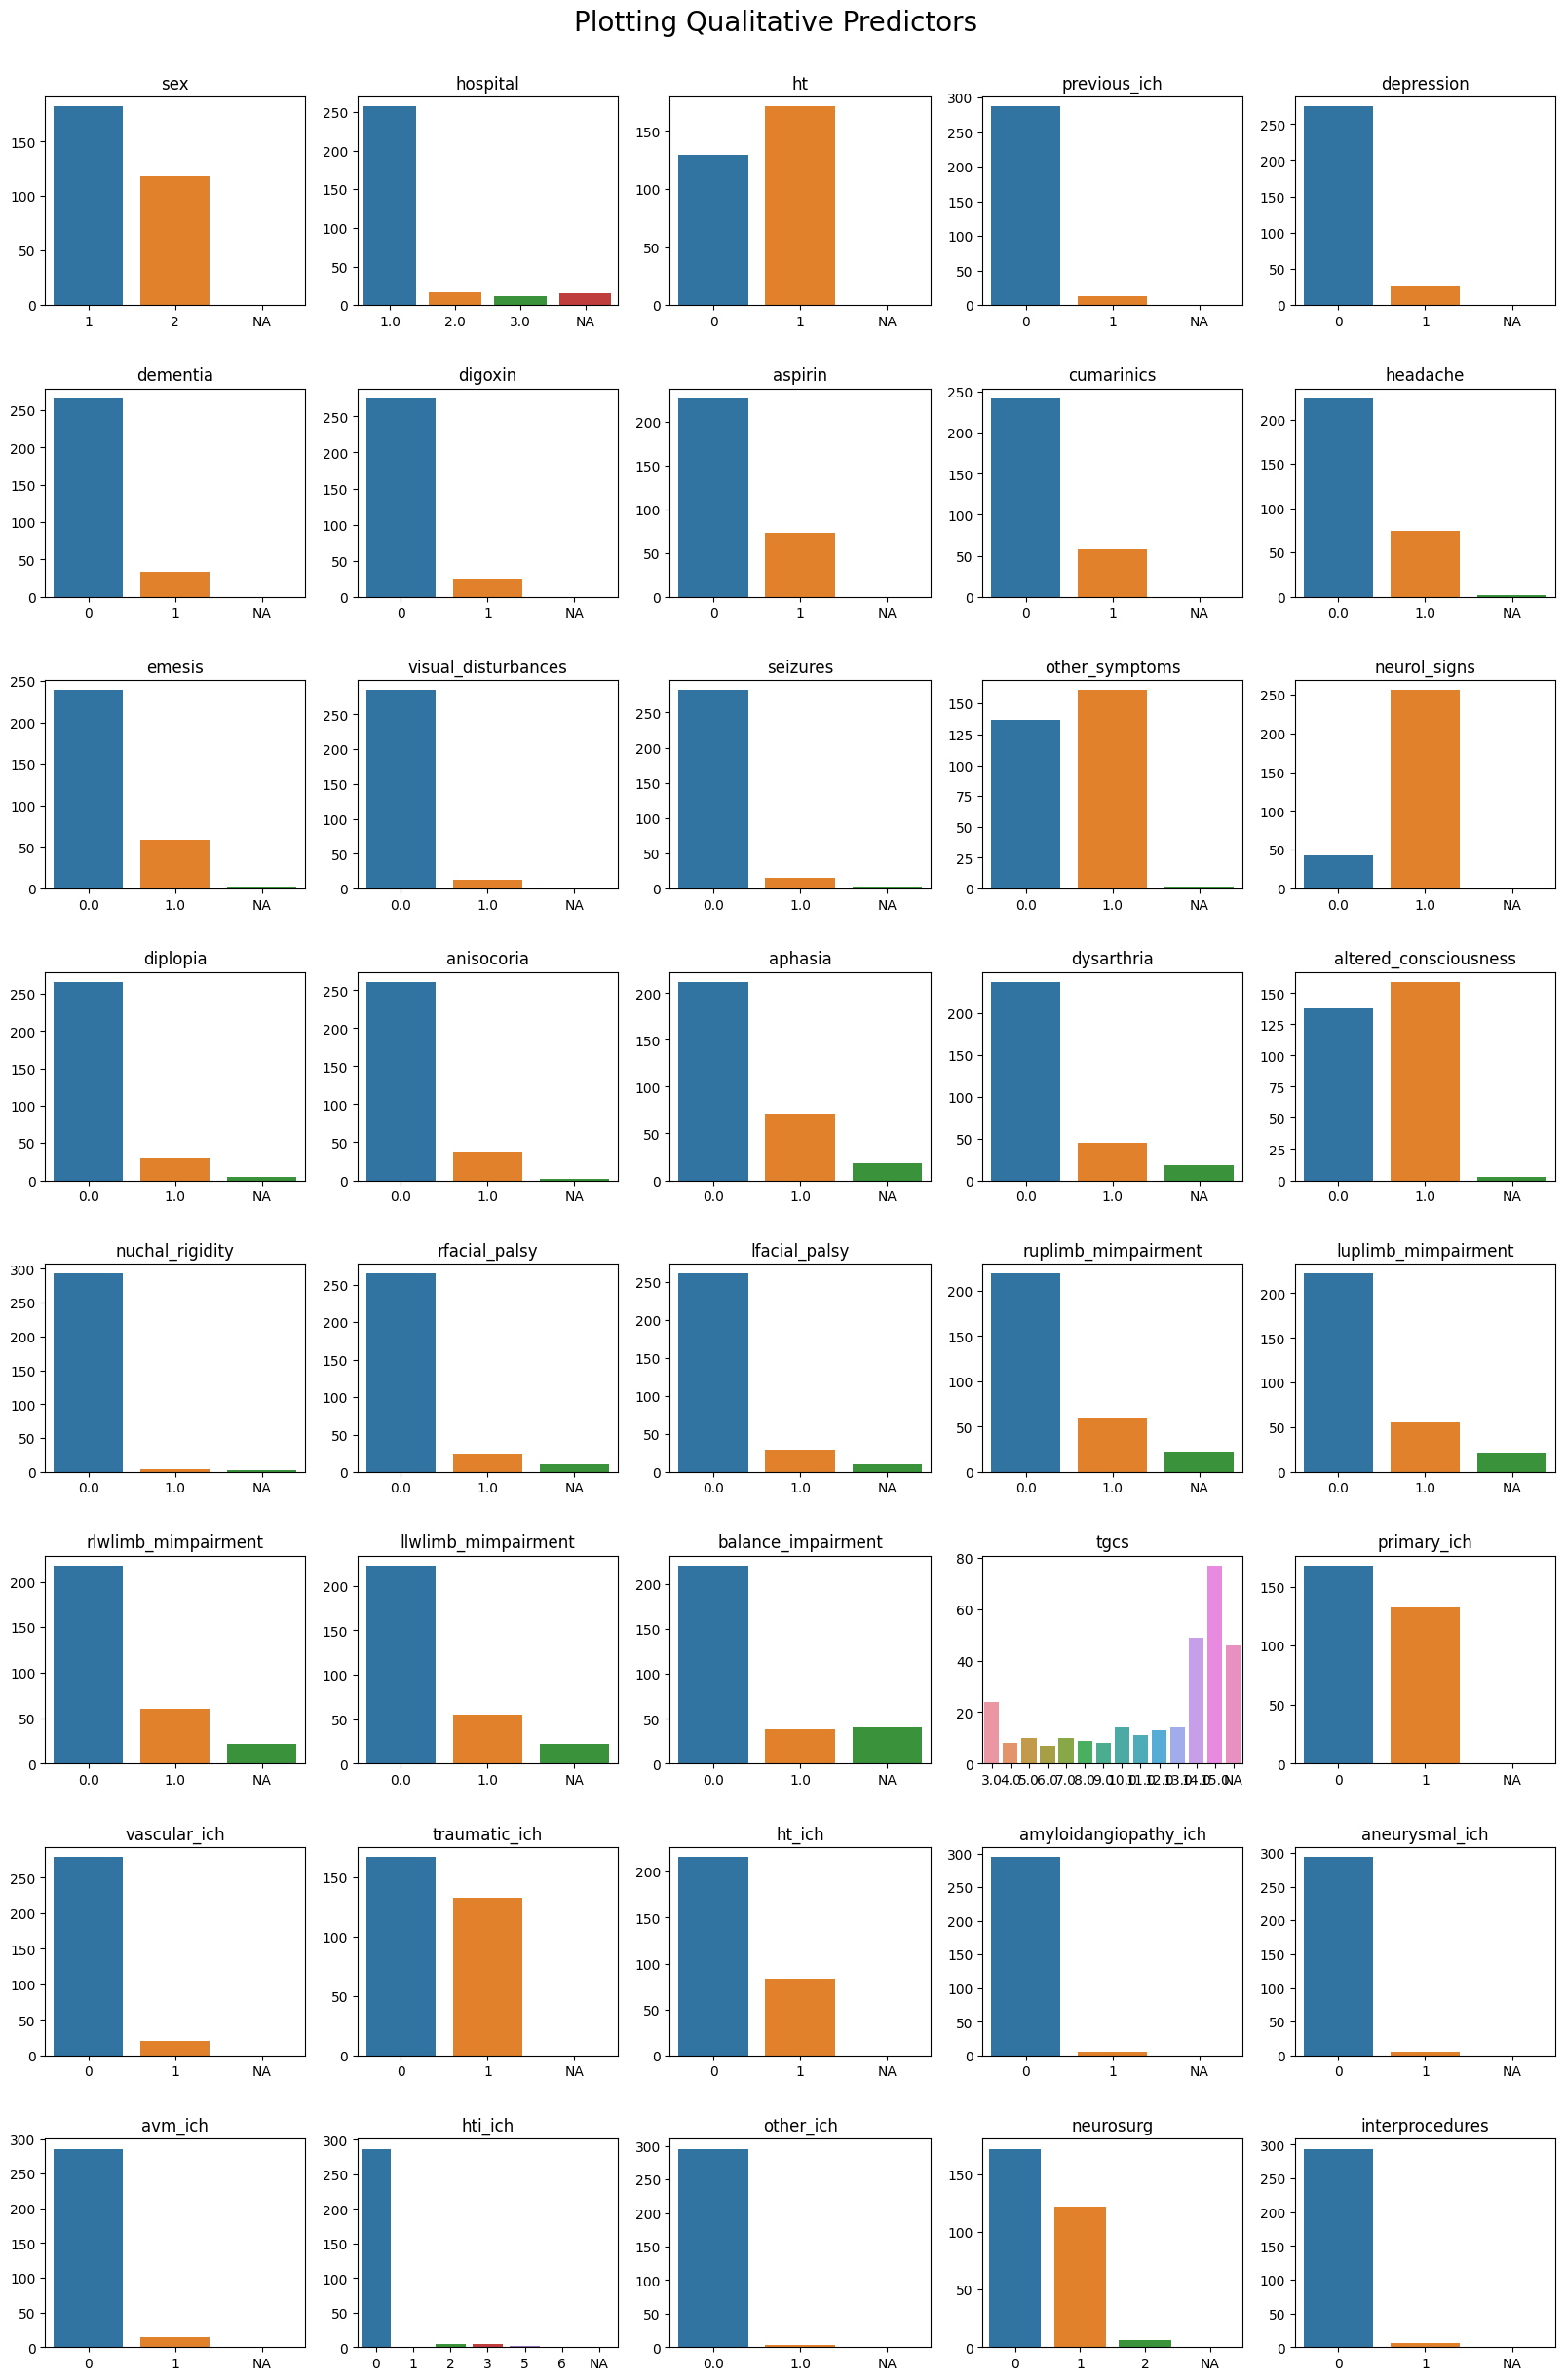

In [11]:
fig2, axs= plt.subplots(8,5, figsize=(20,30))
fig2.suptitle('Plotting Qualitative Predictors', fontsize=20, y=0.91)
idx= 0

for i in range (8):
    for j in range (5):
        if idx < 40:
            useful_functions.plot(df, qualitatives[idx], axs[i,j], 'bars')
            axs[i,j].set_title(qualitatives[idx])
            axs[i,j].set_xlabel('')
            axs[i,j].set_ylabel('')
        elif idx >= 40:
            axs[i,j].axis('off')
        idx= idx+1

plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()